In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import seaborn as sns

# Importing of primary data frame

In [2]:
file_path="food_feed.csv"
df=pd.read_csv(file_path, encoding='unicode_escape')
df.head()


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [3]:
by_country=df.groupby(["Area","Element"]).sum()
by_country.head()


Area Code  Item Code  Element Code  latitude  longitude  \
Area        Element                                                            
Afghanistan Feed            20      27169         55210    339.40     677.10   
            Food           146     197526        375366   2477.62    4942.83   
Albania     Feed            75      67296        138025   1028.75     504.25   
            Food           294     264397        503916   4032.70    1976.66   
Algeria     Feed            88      58945        121462    616.66      36.52   

                      Y1961   Y1962   Y1963   Y1964   Y1965  ...    Y2004  \
Area        Element                                          ...            
Afghanistan Feed      720.0   720.0   736.0   740.0   720.0  ...    704.0   
            Food     8761.0  8694.0  8458.0  9430.0  9753.0  ...  15838.0   
Albania     Feed       94.0   108.0   124.0   122.0    95.0  ...    990.0   
            Food     1612.0  1641.0  1643.0  1767.0  1789.0  ...   5647.0   
Algeria     Feed       83.0    94.0    63.0    98.0    84.0  ...   4575.0   

                       Y2005    Y2006    Y2007    Y2008    Y2009    Y2010  \
Area        Element                                                         
Afghanistan Feed      1184.0   1342.0   1392.0   1294.0   1616.0   1388.0   
            Food     16474.0  16975.0  17856.0  18087.0  19045.0  19642.0   
Albania     Feed       994.0   1047.0    959.0   1075.0   1134.0   1334.0   
            Food      5725.0   5864.0   5785.0   6093.0   6182.0   6573.0   
Algeria     Feed      4401.0   4599.0   4252.0   3436.0   4839.0   5804.0   

                       Y2011  Y2012  Y2013  
Area        Element                         
Afghanistan Feed      1192.0   1522   1536  
            Food     19908.0  21184  21471  
Albania     Feed      1334.0   1312   1319  
            Food      6780.0   6909   6952  
Algeria     Feed      7477.0   8549   8706  

[5 rows x 58 columns]

# IMPORTING SECONDARY DF WITH WORLD POP(RESHAPING) 

In [4]:
#reading the file with pandas and printing as is 
file_path2="country_population.csv"
df2=pd.read_csv(file_path2)
df2.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [5]:
countries=[]
countries=df2['Country Name'].tolist()
d={'Country Name':'s', 'Year':0, 'Population':0}
df_pop=pd.DataFrame(data=d, index=[0])

index_data=0
index_input=0
for c in countries:  
    for y in range(1961, 2014, 1):
        p=df2.loc[index_data,str(y)]
        df_pop.loc[index_input]=[c,y,p] 
        index_input=index_input+1
    index_data=index_data+1

df_pop.sort_values(by=['Country Name'])
df_pop.head()


,Country Name,Year,Population
0,Aruba,1961,55438.0
1,Aruba,1962,56225.0
2,Aruba,1963,56695.0
3,Aruba,1964,57032.0
4,Aruba,1965,57360.0


In [6]:
df_pop_filter=df_pop.loc[df_pop['Country Name'] == 'World']

In [7]:
total_pop=df_pop_filter.groupby(["Year"]).sum()
total_pop['Population_bi']=total_pop['Population']/1000000000
total_pop.head()

,Population,Population_bi
Year,,
1961,3.073369e+09,3.073369
1962,3.126510e+09,3.126510
1963,3.191786e+09,3.191786
1964,3.257460e+09,3.257460
1965,3.324545e+09,3.324545


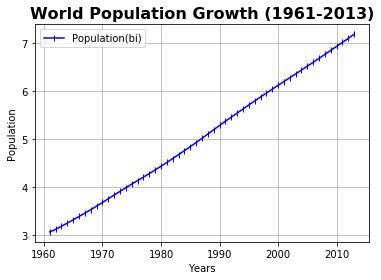

In [8]:
year=[]
for x in range(1961, 2014, 1):
  year.append(x)   


X=year
y=total_pop.Population_bi.values


# Plot line of agr prod worldwide
plt.plot(X, y, marker='|', color="blue", label="Population(bi)")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("World Population Growth (1961-2013)", fontsize=16, fontweight="bold")
plt.xlabel("Years")
plt.ylabel("Population")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/world_pop.png")
plt.show()

# US POPULATION DF

In [121]:
#Setting the columns 'Area' as the new index of the original df
us_pop=df_pop.set_index('Country Name')

In [122]:
us_pop_filter=us_pop.loc[['United States']]
us_pop_filter['Population_bi']=us_pop_filter['Population']/1000000000
us_pop_filter.head()

,Year,Population,Population_bi
Country Name,,,
United States,1961,183691000.0,0.183691
United States,1962,186538000.0,0.186538
United States,1963,189242000.0,0.189242
United States,1964,191889000.0,0.191889
United States,1965,194303000.0,0.194303


#  IN POPULATION DF

In [151]:
in_pop_filter=us_pop.loc[['India']]
in_pop_filter['Population_bi']=in_pop_filter['Population']/1000000000
in_pop_filter.head()

,Year,Population,Population_bi
Country Name,,,
India,1961,458494963.0,0.458495
India,1962,467852537.0,0.467853
India,1963,477527970.0,0.477528
India,1964,487484535.0,0.487485
India,1965,497702365.0,0.497702


# DF FOR PLOTING US NUMBERS

In [9]:
#Setting the columns 'Area' as the new index of the original df
new_index_df=df.set_index('Area')


In [10]:
#filtering by US
df_filtered_us=new_index_df.loc[['United States of America']]


In [11]:
#grouping by element(food/feed), Dropping the columns that are not relevant
by_element=df_filtered_us.groupby(["Element"]).sum()
df_element=by_element.drop(columns=['Area Code', 'Item Code', 'Element Code', 'latitude', 'longitude'])


In [12]:
#transposing the table and adding percentage columns
df_element_us= df_element.T


In [120]:
#adding collumns to plot
df_element_us['Total']=df_element_us['Feed']+df_element_us['Food']
df_element_us['Feed_%']=df_element_us['Feed']/df_element_us['Total']
df_element_us['Food_%']=df_element_us['Food']/df_element_us['Total']
df_element_us['Food_mi']=df_element_us['Food']/1000000
df_element_us['Feed_mi']=df_element_us['Feed']/1000000
year=[]
for x in range(1961, 2014, 1):
  year.append(x)   
df_element_us['Year']=year

df_us=pd.DataFrame(df_element_us)
df_us.head()


Element,Feed,Food,Total,Feed_%,Food_%,Year,Food_mi,Feed_mi
Y1961,234413.0,324934.0,559347.0,0.419083,0.580917,1961,0.324934,0.234413
Y1962,228541.0,327778.0,556319.0,0.410809,0.589191,1962,0.327778,0.228541
Y1963,223570.0,329060.0,552630.0,0.404556,0.595444,1963,0.329060,0.223570
Y1964,218512.0,337165.0,555677.0,0.393236,0.606764,1964,0.337165,0.218512
Y1965,248636.0,340652.0,589288.0,0.421926,0.578074,1965,0.340652,0.248636


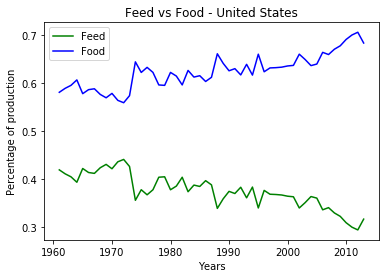

In [14]:
us_x1=df_us['Feed_%']
us_x2=df_us['Food_%']
# Plot our line that will be used to track Food for us
plt.plot(year, us_x1, color="green", label="Feed")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(year, us_x2, color="blue", label="Food")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Feed vs Food - United States")
plt.xlabel("Years")
plt.ylabel("Percentage of production")

# Print our chart to the screen
plt.savefig("Figures/us_ratio.png")
plt.show()


# DF FOR PLOTING INDIA NUMBERS

In [15]:
#filtering by India,
df_filtered1=new_index_df.loc[['India']]


In [16]:
#grouping by element
by_element_in=df_filtered1.groupby(["Element"]).sum()


In [17]:
#...Dropping the columns that are not relevant
df_element1=by_element_in.drop(columns=['Area Code', 'Item Code', 'Element Code', 'latitude', 'longitude'])


In [18]:
#transposing the table
df_element_in= df_element1.T


In [152]:
#adding relevant columns to plot.
df_element_in['Total']=df_element_in['Feed']+df_element_in['Food']
df_element_in['Feed_%']=df_element_in['Feed']/df_element_in['Total']
df_element_in['Food_%']=df_element_in['Food']/df_element_in['Total']
df_element_in['Year']=year
df_element_in['Total_bil_ton']=(df_element_in['Total']*1000)/1000000000
df_element_in['Food_mi']=df_element_in['Food']/1000000
df_element_in['Feed_mi']=df_element_in['Feed']/1000000

df_in=pd.DataFrame(df_element_in)
df_in.head()


Element,Feed,Food,Total,Feed_%,Food_%,Year,Total_bil_ton,Food_mi,Feed_mi
Y1961,15224.0,294341.0,309565.0,0.049179,0.950821,1961,0.309565,0.294341,0.015224
Y1962,15864.0,302938.0,318802.0,0.049761,0.950239,1962,0.318802,0.302938,0.015864
Y1963,15510.0,299645.0,315155.0,0.049214,0.950786,1963,0.315155,0.299645,0.015510
Y1964,15266.0,309298.0,324564.0,0.047035,0.952965,1964,0.324564,0.309298,0.015266
Y1965,16154.0,311222.0,327376.0,0.049344,0.950656,1965,0.327376,0.311222,0.016154


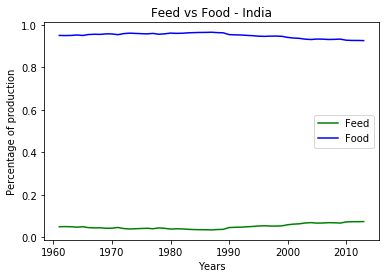

In [153]:
in_x1=df_element_in['Feed_%']
in_x2=df_element_in['Food_%']
# Plot our line that will be used to track Food for us
plt.plot(year, in_x1, color="green", label="Feed")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(year, in_x2, color="blue", label="Food")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Feed vs Food - India")
plt.xlabel("Years")
plt.ylabel("Percentage of production")

# Print our chart to the screen
plt.savefig("Figures/in_ratio.png")
plt.show()

# DF FOR PLOTING OF GLOBAL DATA

In [21]:
#grouping by element(food/feed), Dropping the columns that are not relevant
by_element2=new_index_df.groupby(["Element"]).sum()
df_element2=by_element2.drop(columns=['Area Code', 'Item Code', 'Element Code', 'latitude', 'longitude'])

In [22]:
#transposing the table and adding percentage columns
df_element_gl= df_element2.T

In [23]:
#adding collumns to plot
df_element_gl['Total']=df_element_gl['Feed']+df_element_gl['Food']
df_element_gl['Feed_percent']=df_element_gl['Feed']/df_element_gl['Total']
df_element_gl['Food_percent']=df_element_gl['Food']/df_element_gl['Total']
year=[]
for x in range(1961, 2014, 1):
  year.append(x)   
df_element_gl['Year']=year

df_element_gl['Total_bil_ton']=(df_element_gl['Total']*1000)/1000000000
df_element_gl['Food_mi']=df_element_gl['Food']/1000000
df_element_gl['Total_bil_ton']=(df_element_gl['Total']*1000)/1000000000
df_element_gl['Feed_mi']=df_element_gl['Feed']/1000000

df_element_gl.head()
df_global=pd.DataFrame(df_element_gl)
df_global.head()


Element,Feed,Food,Total,Feed_percent,Food_percent,Year,Total_bil_ton,Food_mi,Feed_mi
Y1961,884314.0,2618297.0,3502611.0,0.252473,0.747527,1961,3.502611,2.618297,0.884314
Y1962,913198.0,2688434.0,3601632.0,0.253551,0.746449,1962,3.601632,2.688434,0.913198
Y1963,954852.0,2730772.0,3685624.0,0.259075,0.740925,1963,3.685624,2.730772,0.954852
Y1964,972294.0,2793351.0,3765645.0,0.258201,0.741799,1964,3.765645,2.793351,0.972294
Y1965,1006792.0,2895741.0,3902533.0,0.257984,0.742016,1965,3.902533,2.895741,1.006792


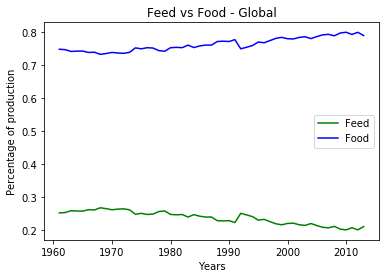

In [24]:
gl_x1=df_global['Feed_percent']
gl_x2=df_global['Food_percent']
# Plot our line that will be used to track Food for us
plt.plot(year, gl_x1, color="green", label="Feed")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(year, gl_x2, color="blue", label="Food")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Feed vs Food - Global")
plt.xlabel("Years")
plt.ylabel("Percentage of production")

# Print our chart to the screen
plt.savefig("Figures/feed_food_ratio.png")
plt.show()

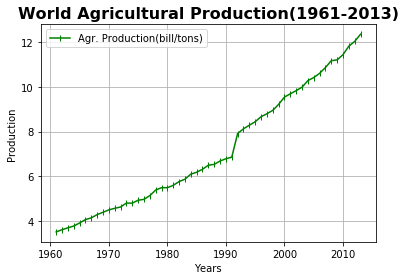

In [25]:
X=year
y=df_element_gl.Total_bil_ton.values


# Plot line of agr prod worldwide
plt.plot(X, y, marker='|', color="green", label="Agr. Production(bill/tons)")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("World Agricultural Production(1961-2013)", fontsize=16, fontweight="bold")
plt.xlabel("Years")
plt.ylabel("Production")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/world_agr.png")
plt.show()

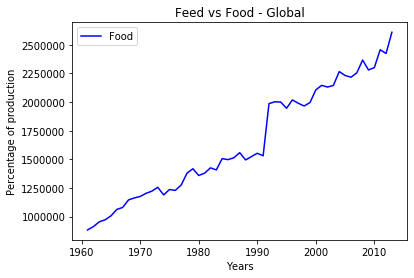

In [73]:
gl_x2=df_global['Feed']

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(year, gl_x2, color="blue", label="Food")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Feed vs Food - Global")
plt.xlabel("Years")
plt.ylabel("Percentage of production")

# Print our chart to the screen
plt.show()

# Applying linear regression model to Food x Year


In [74]:
gl_food=df_global[['Food', 'Year']].copy()
gl_food.head()


Element,Food,Year
Y1961,2618297.0,1961
Y1962,2688434.0,1962
Y1963,2730772.0,1963
Y1964,2793351.0,1964
Y1965,2895741.0,1965


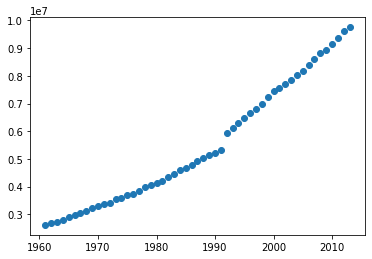

In [75]:
X=gl_food['Year']
y=gl_food['Food']
plt.scatter(X, y)


In [76]:
X = gl_food.Year.values.reshape(-1, 1)
y = gl_food.Food.values.reshape(-1, 1)


In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
model.fit(X, y)
print(model)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [79]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[139831.41017578]]
y-axis intercept:  [-2.72347364e+08]


## Y= 0.81X - 358276.55

In [80]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")



Min X Value: [[1961]]
Max X Value: [[2013]]


In [81]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)


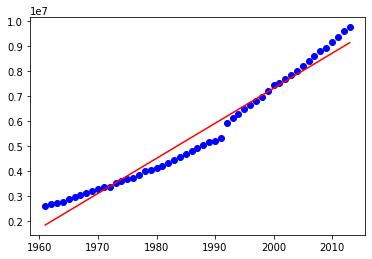

In [82]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')


In [83]:
food_predicted=[]
for x in range(2014, 2022, 1):
    y=(float(model.coef_)*(x))+(float(model.intercept_))
    food_predicted.append(y)   

print(food_predicted)



[9273096.433236599, 9412927.84341234, 9552759.25358814, 9692590.66376394, 9832422.073939681, 9972253.484115481, 10112084.894291222, 10251916.304467022]


# Applying linear regression model to Feed x Year

In [84]:
gl_feed=df_global[[ 'Feed', 'Year']].copy()
gl_feed.head()


Element,Feed,Year
Y1961,884314.0,1961
Y1962,913198.0,1962
Y1963,954852.0,1963
Y1964,972294.0,1964
Y1965,1006792.0,1965


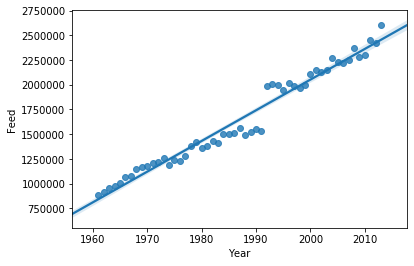

In [85]:
X=gl_feed['Year']
y=gl_feed['Feed']
sns.regplot(X,y)

#plt.scatter(X, y)


In [86]:
X = gl_feed.Year.values.reshape(-1, 1)
y = gl_feed.Feed.values.reshape(-1, 1)


In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
model.fit(X, y)
print(model)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [89]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[31049.74600871]]
y-axis intercept:  [-60047756.43251089]


## Y= 0.18X + 358276

In [90]:
#using model to make predictions
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")


True output: [884314.]
Predicted output: [840795.49056603]
Prediction Error: [-43518.50943397]


In [91]:
#"Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]
table=pd.DataFrame(predictions)
table["Actual"]=y
table["Eroor"]=predictions-y
table.rename(columns={0: "Prediction"}, inplace=True)
table.head()


,Prediction,Actual,Eroor
0,840795.490566,884314.0,-43518.509434
1,871845.236575,913198.0,-41352.763425
2,902894.982583,954852.0,-51957.017417
3,933944.728592,972294.0,-38349.271408
4,964994.474601,1006792.0,-41797.525399


# PLOTING TOTAL CROP PRODUCTION AGAINST POPULATION

No handles with labels found to put in legend.


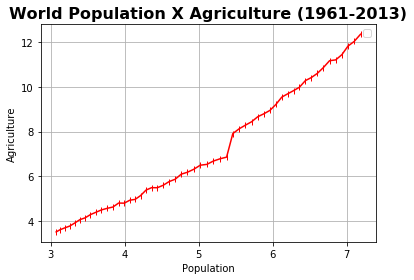

In [92]:
X=total_pop.Population_bi.values
y=df_element_gl.Total_bil_ton.values


# Plot line of agr prod worldwide
plt.plot(X, y, marker='|', color="red")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("World Population X Agriculture (1961-2013)", fontsize=16, fontweight="bold")
plt.xlabel("Population")
plt.ylabel("Agriculture")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/world_pop_agr.png")
plt.show()

random forest regression / decision tree

In [93]:
X=total_pop.Population_bi.values.reshape(-1, 1)
y=df_global.Total_bil_ton.values.reshape(-1, 1)

In [94]:
X.shape

(53, 1)

In [95]:
y.shape

(53, 1)

In [96]:
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Create a linear model
model = LinearRegression()

# Fit (Train) our model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.15790013253298468
R-squared (R2 ): 0.9775749577913185


In [98]:
model.score(X, y)

0.9775749577913185

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [100]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
model.score(X_train, y_train)

0.9743795368570504

In [102]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[2.1346904]]
y-axis intercept:  [-3.69657832]


In [103]:
model.score(X_test, y_test)

0.9836414483641145

In [104]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[2.1346904]]
y-axis intercept:  [-3.69657832]


In [105]:
pred = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [3.502611]
Predicted output: [840795.49056603]
Prediction Error: [840791.98795503]


In [106]:
table=pd.DataFrame(predictions)
table["Actual"]=y
table["Error"]=predictions-y
table.rename(columns={0: "Prediction"}, inplace=True)
table.head()
                

,Prediction,Actual,Error
0,840795.490566,3.502611,840791.987955
1,871845.236575,3.601632,871841.634943
2,902894.982583,3.685624,902891.296959
3,933944.728592,3.765645,933940.962947
4,964994.474601,3.902533,964990.572068


In [107]:
table["Error"].mean()

1648081.741055203

In [108]:
# Ploting model fitting

In [109]:
x_min= X_train.min()
x_max = X_train.max()

In [110]:
y_min_actual = y.min()
y_max_actual = y.max()

In [111]:
y_min = -3.69657832 + 2.1346904 * x_min
y_max = -3.69657832 + 2.13469044 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 3.502611
Calculated Min Value: 2.864112100465156
Actual Max Value: 12.361248
Calculated Max Value: 11.641339752934735


In [ ]:
plt.scatter(X, y, marker='|' , c='red', label="Actual")
plt.plot([x_min, x_max], [y_min, y_max], marker='|' , c='grey', label="Prediction")


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("World Population X Agriculture(Model Fitting)", fontsize=16, fontweight="bold")
plt.xlabel("Population")
plt.ylabel("Agriculture")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/world_pop_agr_precision.png")
plt.show()

#  ======Ploting prediction 1960 to 2040========

In [ ]:
X_new=[7.295290765, 7.379797139, 7.464022049, 7.547858925, 7.631091248, 7.713468100, 7.794798739, 7.874965825, 7.953952567, 8.031800429, 8.108605388, 8.184437460, 8.259276737, 8.333087316, 8.405863295, 8.477660693, 8.548487400, 8.618349489, 8.687227850, 8.755083431, 8.821562661, 8.887524213, 8.952048940, 9.015437653, 9.138828468, 9.198847240]

In [ ]:
X_fut=pd.DataFrame(X_new)

In [ ]:
X_fut.shape

In [ ]:
pred = model.predict(X_fut)

In [ ]:
x_min_pred= X_fut.min()
x_max_pred = X_fut.max()

In [ ]:
y_min_pred = -3.69657832 + 2.1346904 * x_min_pred
y_max_pred = -3.69657832 + 2.13469044 * x_max_pred

In [ ]:
plt.scatter(X, y, marker='|' , c='red', label="Actual")
plt.plot(X_fut, pred, marker='|' , c='grey', label="Prediction")



# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("World Agriculture Prediction(1960 to 2040)", fontsize=16, fontweight="bold")
plt.xlabel("Population")
plt.ylabel("Agriculture")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/world_pop_agr_predict.png")
plt.show()

#  FOOD AND POPULATION

No handles with labels found to put in legend.


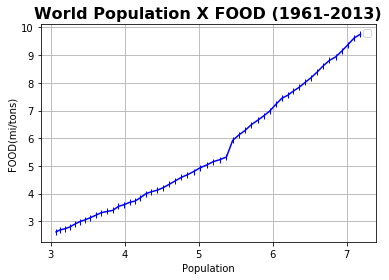

In [28]:
X=total_pop.Population_bi.values
y=df_global.Food_mi.values


# Plot line of agr prod worldwide
plt.plot(X, y, marker='|', color="blue")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("World Population X FOOD (1961-2013)", fontsize=16, fontweight="bold")
plt.xlabel("Population")
plt.ylabel("FOOD(mi/tons)")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/FOODVSPOP.png")
plt.show()

In [29]:
X=total_pop.Population_bi.values.reshape(-1, 1)
y=df_global.Food_mi.values.reshape(-1, 1)

In [30]:
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Create a linear model
model = LinearRegression()

# Fit (Train) our model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.12068872581173219
R-squared (R2 ): 0.9745000510749685


In [32]:
model.score(X, y)

0.9745000510749685

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[1.74980349]]
y-axis intercept:  [-3.38558816]


In [36]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [2.618297]
Predicted output: [1.99220291]
Prediction Error: [-0.62609409]


In [37]:
table=pd.DataFrame(predictions)
table["Actual"]=y
table["Error"]=predictions-y
table.rename(columns={0: "Prediction"}, inplace=True)
table.head()
              

,Prediction,Actual,Error
0,1.992203,2.618297,-0.626094
1,2.085190,2.688434,-0.603244
2,2.199411,2.730772,-0.531361
3,2.314326,2.793351,-0.479025
4,2.431713,2.895741,-0.464028


In [38]:
x_min= X_train.min()
x_max = X_train.max()

In [39]:
y_min_actual = y.min()
y_max_actual = y.max()

In [40]:
y_min = -3.38558816 + 1.74980349 * x_min
y_max = -3.38558816 + 1.74980349 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 2.618297
Calculated Min Value: 1.9922029213387722
Actual Max Value: 9.752737
Calculated Max Value: 9.186887019752653


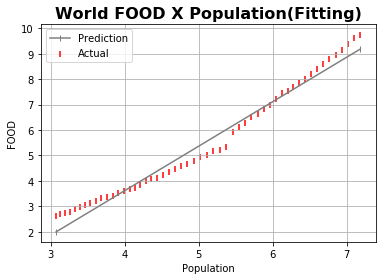

In [46]:
plt.scatter(X, y, marker='|' , c='red', label="Actual")
plt.plot([x_min, x_max], [y_min, y_max], marker='|' , c='grey', label="Prediction")


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("World FOOD X Population(Fitting)", fontsize=16, fontweight="bold")
plt.xlabel("Population")
plt.ylabel("FOOD")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/world_food_fit.png")
plt.show()

In [47]:
X_new=[7.295290765, 7.379797139, 7.464022049, 7.547858925, 7.631091248, 7.713468100, 7.794798739, 7.874965825, 7.953952567, 8.031800429, 8.108605388, 8.184437460, 8.259276737, 8.333087316, 8.405863295, 8.477660693, 8.548487400, 8.618349489, 8.687227850, 8.755083431, 8.821562661, 8.887524213, 8.952048940, 9.015437653, 9.138828468, 9.198847240]

In [48]:
X_fut=pd.DataFrame(X_new)

In [49]:
pred = model.predict(X_fut)

In [50]:
x_min_pred= X_fut.min()
x_max_pred = X_fut.max()

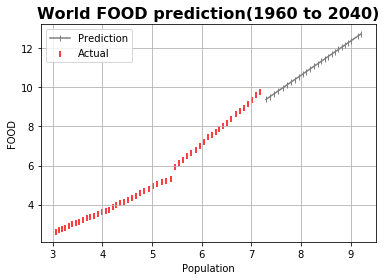

In [52]:
plt.scatter(X, y, marker='|' , c='red', label="Actual")
plt.plot(X_fut, pred, marker='|' , c='grey', label="Prediction")



# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("World FOOD prediction(1960 to 2040)", fontsize=16, fontweight="bold")
plt.xlabel("Population")
plt.ylabel("FOOD")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/world_FOODpredict.png")
plt.show()

#  FEED AND POPULATION

No handles with labels found to put in legend.


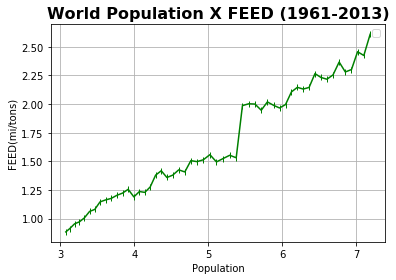

In [53]:
X=total_pop.Population_bi.values
y=df_global.Feed_mi.values


# Plot line of agr prod worldwide
plt.plot(X, y, marker='|', color="green")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("World Population X FEED (1961-2013)", fontsize=16, fontweight="bold")
plt.xlabel("Population")
plt.ylabel("FEED(mi/tons)")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/FEEDVSPOP.png")
plt.show()

In [54]:
X=total_pop.Population_bi.values.reshape(-1, 1)
y=df_global.Feed_mi.values.reshape(-1, 1)

In [55]:
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Create a linear model
model = LinearRegression()

# Fit (Train) our model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.006979005642241212
R-squared (R2 ): 0.9701191106238106


In [57]:
model.score(X, y)

0.9701191106238106

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [59]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.38488691]]
y-axis intercept:  [-0.31099015]


In [61]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [0.884314]
Predicted output: [0.8719092]
Prediction Error: [-0.0124048]


In [62]:
table=pd.DataFrame(predictions)
table["Actual"]=y
table["Error"]=predictions-y
table.rename(columns={0: "Prediction"}, inplace=True)
table.head()
              

,Prediction,Actual,Error
0,0.871909,0.884314,-0.012405
1,0.892363,0.913198,-0.020835
2,0.917487,0.954852,-0.037365
3,0.942763,0.972294,-0.029531
4,0.968584,1.006792,-0.038208


In [63]:
x_min= X_train.min()
x_max = X_train.max()

In [64]:
y_min_actual = y.min()
y_max_actual = y.max()

In [65]:
y_min = -0.31099015 + 0.38488691 * x_min
y_max = -0.31099015 + 0.38488691 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 0.884314
Calculated Min Value: 0.871909189126383
Actual Max Value: 2.608511
Calculated Max Value: 2.4544524557789464


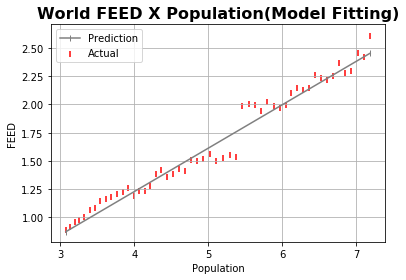

In [66]:
plt.scatter(X, y, marker='|' , c='red', label="Actual")
plt.plot([x_min, x_max], [y_min, y_max], marker='|' , c='grey', label="Prediction")


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("World FEED X Population(Model Fitting)", fontsize=16, fontweight="bold")
plt.xlabel("Population")
plt.ylabel("FEED")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/world_feed_fit.png")
plt.show()

In [67]:
X_new=[7.295290765, 7.379797139, 7.464022049, 7.547858925, 7.631091248, 7.713468100, 7.794798739, 7.874965825, 7.953952567, 8.031800429, 8.108605388, 8.184437460, 8.259276737, 8.333087316, 8.405863295, 8.477660693, 8.548487400, 8.618349489, 8.687227850, 8.755083431, 8.821562661, 8.887524213, 8.952048940, 9.015437653, 9.138828468, 9.198847240]

In [68]:
X_fut=pd.DataFrame(X_new)

In [69]:
pred = model.predict(X_fut)

In [70]:
x_min_pred= X_fut.min()
x_max_pred = X_fut.max()

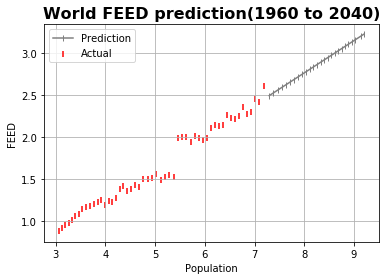

In [72]:
plt.scatter(X, y, marker='|' , c='red', label="Actual")
plt.plot(X_fut, pred, marker='|' , c='grey', label="Prediction")



# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("World FEED prediction(1960 to 2040)", fontsize=16, fontweight="bold")
plt.xlabel("Population")
plt.ylabel("FEED")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/world_FEEDpredict.png")
plt.show()

#  US FOOD X POP

In [129]:
X=us_pop_filter.Population_bi.values
y=df_us.Food_mi.values
X=us_pop_filter.Population_bi.values.reshape(-1, 1)
y=df_us.Food_mi.values.reshape(-1, 1)

In [130]:
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Create a linear model
model = LinearRegression()

# Fit (Train) our model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.0002529365102701983
R-squared (R2 ): 0.9776931542558598


In [132]:
model.score(X, y)

0.9776931542558599

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [134]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[2.66455219]]
y-axis intercept:  [-0.16272045]


In [136]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [0.324934]
Predicted output: [0.3267338]
Prediction Error: [0.0017998]


In [137]:
table=pd.DataFrame(predictions)
table["Actual"]=y
table["Error"]=predictions-y
table.rename(columns={0: "Prediction"}, inplace=True)
table.head()
              

,Prediction,Actual,Error
0,0.326734,0.324934,0.001800
1,0.334320,0.327778,0.006542
2,0.341525,0.329060,0.012465
3,0.348578,0.337165,0.011413
4,0.355010,0.340652,0.014358


In [138]:
x_min= X_train.min()
x_max = X_train.max()
y_min_actual = y.min()
y_max_actual = y.max()
y_min = -0.16272045 + 2.66455219 * x_min
y_max = -0.16272045 + 2.66455219 * x_max

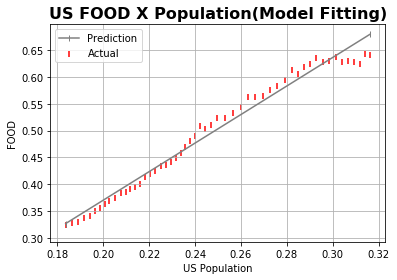

In [139]:
plt.scatter(X, y, marker='|' , c='red', label="Actual")
plt.plot([x_min, x_max], [y_min, y_max], marker='|' , c='grey', label="Prediction")


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("US FOOD X Population(Model Fitting)", fontsize=16, fontweight="bold")
plt.xlabel("US Population")
plt.ylabel("FOOD")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/us_food_fit.png")
plt.show()

#  US FEED X POP

In [140]:
X=us_pop_filter.Population_bi.values
y=df_us.Feed_mi.values
X=us_pop_filter.Population_bi.values.reshape(-1, 1)
y=df_us.Feed_mi.values.reshape(-1, 1)

In [141]:
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Create a linear model
model = LinearRegression()

# Fit (Train) our model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.000839456595176927
R-squared (R2 ): 0.43004155148857726


In [143]:
model.score(X, y)

0.4300415514885773

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.63224198]]
y-axis intercept:  [0.13831499]


In [146]:
predictions = model.predict(X)

In [147]:
x_min= X_train.min()
x_max = X_train.max()
y_min_actual = y.min()
y_max_actual = y.max()
y_min = 0.138314995 + 0.63224198 * x_min
y_max = 0.13831499 + 0.63224198 * x_max

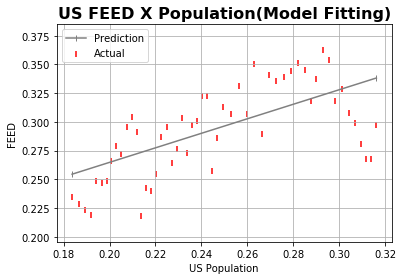

In [148]:
plt.scatter(X, y, marker='|' , c='red', label="Actual")
plt.plot([x_min, x_max], [y_min, y_max], marker='|' , c='grey', label="Prediction")


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("US FEED X Population(Model Fitting)", fontsize=16, fontweight="bold")
plt.xlabel("US Population")
plt.ylabel("FEED")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/us_feed_fit.png")
plt.show()

#  IN FEED VS POP

In [154]:
X=in_pop_filter.Population_bi.values
y=df_in.Feed_mi.values
X=in_pop_filter.Population_bi.values.reshape(-1, 1)
y=df_in.Feed_mi.values.reshape(-1, 1)

In [155]:
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Create a linear model
model = LinearRegression()

# Fit (Train) our model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 7.602656401708818e-05
R-squared (R2 ): 0.8786626467490585


In [157]:
model.score(X, y)

0.8786626467490585

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.09330949]]
y-axis intercept:  [-0.04126713]


In [162]:
predictions = model.predict(X)

In [163]:
x_min= X_train.min()
x_max = X_train.max()
y_min_actual = y.min()
y_max_actual = y.max()
y_min = -0.04126713 + 0.09330949 * x_min
y_max = -0.04126713 + 0.09330949 * x_max

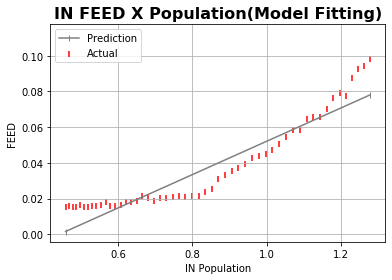

In [164]:
plt.scatter(X, y, marker='|' , c='red', label="Actual")
plt.plot([x_min, x_max], [y_min, y_max], marker='|' , c='grey', label="Prediction")


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("IN FEED X Population(Model Fitting)", fontsize=16, fontweight="bold")
plt.xlabel("IN Population")
plt.ylabel("FEED")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/in_feed_fit.png")
plt.show()

#  IN FOOD VS POP

In [165]:
X=in_pop_filter.Population_bi.values
y=df_in.Food_mi.values
X=in_pop_filter.Population_bi.values.reshape(-1, 1)
y=df_in.Food_mi.values.reshape(-1, 1)

In [166]:
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Create a linear model
model = LinearRegression()

# Fit (Train) our model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.0013548860573261916
R-squared (R2 ): 0.9821884406189725


In [168]:
model.score(X, y)

0.9821884406189725

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[1.08910926]]
y-axis intercept:  [-0.25704929]


In [171]:
predictions = model.predict(X)

In [173]:
x_min= X_train.min()
x_max = X_train.max()
y_min_actual = y.min()
y_max_actual = y.max()
y_min = -0.25704929 + 1.08910926 * x_min
y_max = -0.25704929 + 1.08910926 * x_max

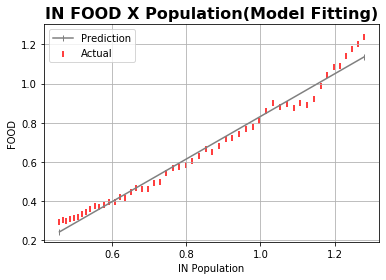

In [174]:
plt.scatter(X, y, marker='|' , c='red', label="Actual")
plt.plot([x_min, x_max], [y_min, y_max], marker='|' , c='grey', label="Prediction")


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("IN FOOD X Population(Model Fitting)", fontsize=16, fontweight="bold")
plt.xlabel("IN Population")
plt.ylabel("FOOD")
plt.grid()

# Print our chart to the screen
plt.savefig("Figures/in_food_fit.png")
plt.show()